<a href="https://colab.research.google.com/github/Mani512996/pocs/blob/main/NLP_game_of_thrones_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

In [ ]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 24.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
df=pd.read_csv("gameofthrones.csv")  
df 

,Region,House,Sigil,Blazon,Seat,Words,Origin,Notes,Ancestral weapon
0,Westerlands,House Algood,https://awoiaf.westeros.org/index.php/File:Hou...,"A golden wreath on blue, a gold border",NaN,NaN,NaN,NaN,NaN
1,Dorne,House Allyrion of Godsgrace,https://awoiaf.westeros.org/index.php/File:Hou...,A golden hand on gyronny red and black,Godsgrace,No Foe May Pass,NaN,NaN,NaN
2,North,House Amber,https://awoiaf.westeros.org/index.php/File:Non...,Unknown,NaN,NaN,NaN,extinct before the Andal invasion,NaN
3,Reach,House Ambrose,https://awoiaf.westeros.org/index.php/File:Hou...,A yellow field strewn with red ants,NaN,Never Resting,NaN,NaN,NaN
4,Iron Islands (Shield Islands),House Andrik of Southshield,https://awoiaf.westeros.org/index.php/File:Non...,Unknown,Southshield,NaN,Andrik the Unsmiling,NaN,NaN
...,...,...,...,...,...,...,...,...,...
458,Reach,House Wythers,https://awoiaf.westeros.org/index.php/File:Hou...,A grey squirrel on white with red border,NaN,NaN,NaN,NaN,NaN
459,Westerlands,House Yarwyck,https://awoiaf.westeros.org/index.php/File:Hou...,2 bronze halberds crossed between 4 red diamon...,NaN,NaN,NaN,NaN,NaN
460,Reach,House Yelshire,https://awoiaf.westeros.org/index.php/File:Hou...,"Barry green and gold, a black battering ram wi...",NaN,NaN,NaN,NaN,NaN
461,Westerlands,House Yew,https://awoiaf.westeros.org/index.php/File:Hou...,A golden longbow on white between two crimson ...,NaN,NaN,Alan o' the Oak,NaN,NaN


In [ ]:
df.isnull().sum()

Region                0
House                 0
Sigil                 0
Blazon                0
Seat                221
Words               395
Origin              344
Notes               420
Ancestral weapon    447
dtype: int64

In [ ]:
df[df['Region'] == 'Westerlands']


,Region,House,Sigil,Blazon,Seat,Words,Origin,Notes,Ancestral weapon
0,Westerlands,House Algood,https://awoiaf.westeros.org/index.php/File:Hou...,"A golden wreath on blue, a gold border",NaN,NaN,NaN,NaN,NaN
13,Westerlands,House Banefort of Banefort,https://awoiaf.westeros.org/index.php/File:Hou...,"A hooded man, black on grey, within a fiery tr...",Banefort,NaN,Hooded Man,NaN,NaN
21,Westerlands,House Bettley,https://awoiaf.westeros.org/index.php/File:Hou...,Three blue beetles on gold,NaN,NaN,NaN,NaN,NaN
42,Westerlands,House Brax of Hornvale,https://awoiaf.westeros.org/index.php/File:Hou...,A purple unicorn on silver,Hornvale,NaN,NaN,NaN,NaN
48,Westerlands,House Broom,https://awoiaf.westeros.org/index.php/File:Hou...,A silver helm crested with a sprig of broom on...,NaN,NaN,NaN,NaN,NaN
64,Westerlands,House Casterly of Casterly Rock,https://awoiaf.westeros.org/index.php/File:Non...,Unknown,Casterly Rock,NaN,Corlos,extinct sometime during Age of Heroes,NaN
74,Westerlands,House Clegane of Clegane's Keep,https://awoiaf.westeros.org/index.php/File:Hou...,Three black dogs running on yellow,Clegane's Keep,NaN,Clegane,NaN,NaN
75,Westerlands,House Clifton,https://awoiaf.westeros.org/index.php/File:Non...,Unknown,NaN,NaN,NaN,NaN,NaN
89,Westerlands,House Crakehall of Crakehall,https://awoiaf.westeros.org/index.php/File:Hou...,A black and white brindled boar on brown,Crakehall,None so Fierce,Crake the Boarkiller,NaN,NaN
105,Westerlands,House Doggett,https://awoiaf.westeros.org/index.php/File:Hou...,"Per bend a white unicorn on green, a black rav...",NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes


Region              object
House               object
Sigil               object
Blazon              object
Seat                object
Words               object
Origin              object
Notes               object
Ancestral weapon    object
dtype: object

In [ ]:
#converting object type into string
df = df.astype('string')
df.dtypes

Region              string
House               string
Sigil               string
Blazon              string
Seat                string
Words               string
Origin              string
Notes               string
Ancestral weapon    string
dtype: object

In [ ]:
text = df['House'].iloc[:].values
text

<StringArray>
[               'House Algood', 'House Allyrion of Godsgrace',
                 'House Amber',               'House Ambrose',
 'House Andrik of Southshield',  'House Appleton of Appleton',
     'House Arryn of Gulltown',                 'House Arryn',
    'House Ashford of Ashford',               'House Ashwood',
 ...
                  'House Wull',                'House Wydman',
    'House Wyl of the Boneway',   'House Wylde of Rain House',
    'House Wynch of Iron Holt',               'House Wythers',
               'House Yarwyck',              'House Yelshire',
                   'House Yew',  'House Yronwood of Yronwood']
Length: 463, dtype: string

In [ ]:
text1 = df['Blazon'].iloc[:].values
text1

<StringArray>
[                                                                                                                                                            'A golden wreath on blue, a gold border',
                                                                                                                                                             'A golden hand on gyronny red and black',
                                                                                                                                                                                            'Unknown',
                                                                                                                                                                'A yellow field strewn with red ants',
                                                                                                                                                                                            'U

In [ ]:
feed = ' '
feed = feed.join(text)
feed = feed.lower()
feed

"house algood house allyrion of godsgrace house amber house ambrose house andrik of southshield house appleton of appleton house arryn of gulltown house arryn house ashford of ashford house ashwood house baelish of harrenhal house baelish of the fingers house ball house banefort of banefort house bar emmon of sharp point house baratheon of dragonstone house baratheon of king's landing house baratheon of storm's end house beesbury of honeyholt house belgrave house belmore of strongsong house bettley house bigglestone house blackbar of bandallon house blackberry house blackfyre house blackmont of blackmont house blackmyre house blacktyde of blacktyde house blackwood of raventree hall house blanetree house blount house boggs house boggs (north) house bole house bolling house bolton of the dreadfort house bolton of winterfell house borrell of sweetsister house botley of lordsport house bracken of stone hedge house branch house brax of hornvale house breakstone house briar house bridges hou

In [ ]:
feed1 = ' '
feed1 = feed.join(text1)
feed1 = feed.lower()
feed1

"house algood house allyrion of godsgrace house amber house ambrose house andrik of southshield house appleton of appleton house arryn of gulltown house arryn house ashford of ashford house ashwood house baelish of harrenhal house baelish of the fingers house ball house banefort of banefort house bar emmon of sharp point house baratheon of dragonstone house baratheon of king's landing house baratheon of storm's end house beesbury of honeyholt house belgrave house belmore of strongsong house bettley house bigglestone house blackbar of bandallon house blackberry house blackfyre house blackmont of blackmont house blackmyre house blacktyde of blacktyde house blackwood of raventree hall house blanetree house blount house boggs house boggs (north) house bole house bolling house bolton of the dreadfort house bolton of winterfell house borrell of sweetsister house botley of lordsport house bracken of stone hedge house branch house brax of hornvale house breakstone house briar house bridges hou

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import word_tokenize
import nltk
tokens = word_tokenize(feed)

In [ ]:
tokens


['house',
 'algood',
 'house',
 'allyrion',
 'of',
 'godsgrace',
 'house',
 'amber',
 'house',
 'ambrose',
 'house',
 'andrik',
 'of',
 'southshield',
 'house',
 'appleton',
 'of',
 'appleton',
 'house',
 'arryn',
 'of',
 'gulltown',
 'house',
 'arryn',
 'house',
 'ashford',
 'of',
 'ashford',
 'house',
 'ashwood',
 'house',
 'baelish',
 'of',
 'harrenhal',
 'house',
 'baelish',
 'of',
 'the',
 'fingers',
 'house',
 'ball',
 'house',
 'banefort',
 'of',
 'banefort',
 'house',
 'bar',
 'emmon',
 'of',
 'sharp',
 'point',
 'house',
 'baratheon',
 'of',
 'dragonstone',
 'house',
 'baratheon',
 'of',
 'king',
 "'s",
 'landing',
 'house',
 'baratheon',
 'of',
 'storm',
 "'s",
 'end',
 'house',
 'beesbury',
 'of',
 'honeyholt',
 'house',
 'belgrave',
 'house',
 'belmore',
 'of',
 'strongsong',
 'house',
 'bettley',
 'house',
 'bigglestone',
 'house',
 'blackbar',
 'of',
 'bandallon',
 'house',
 'blackberry',
 'house',
 'blackfyre',
 'house',
 'blackmont',
 'of',
 'blackmont',
 'house',
 'bla

In [ ]:
from nltk import word_tokenize
import nltk
tokens1 = word_tokenize(feed1)


In [ ]:
tokens1




['house',
 'algood',
 'house',
 'allyrion',
 'of',
 'godsgrace',
 'house',
 'amber',
 'house',
 'ambrose',
 'house',
 'andrik',
 'of',
 'southshield',
 'house',
 'appleton',
 'of',
 'appleton',
 'house',
 'arryn',
 'of',
 'gulltown',
 'house',
 'arryn',
 'house',
 'ashford',
 'of',
 'ashford',
 'house',
 'ashwood',
 'house',
 'baelish',
 'of',
 'harrenhal',
 'house',
 'baelish',
 'of',
 'the',
 'fingers',
 'house',
 'ball',
 'house',
 'banefort',
 'of',
 'banefort',
 'house',
 'bar',
 'emmon',
 'of',
 'sharp',
 'point',
 'house',
 'baratheon',
 'of',
 'dragonstone',
 'house',
 'baratheon',
 'of',
 'king',
 "'s",
 'landing',
 'house',
 'baratheon',
 'of',
 'storm',
 "'s",
 'end',
 'house',
 'beesbury',
 'of',
 'honeyholt',
 'house',
 'belgrave',
 'house',
 'belmore',
 'of',
 'strongsong',
 'house',
 'bettley',
 'house',
 'bigglestone',
 'house',
 'blackbar',
 'of',
 'bandallon',
 'house',
 'blackberry',
 'house',
 'blackfyre',
 'house',
 'blackmont',
 'of',
 'blackmont',
 'house',
 'bla

In [ ]:
stops = set(stopwords.words('english'))
tokens = [token.strip() for token in tokens if token not in stops]
remove = [',', ':', '\'s', 'unknown']
tokens = [token.strip() for token in tokens if token not in remove]
blazons = nltk.Text(tokens)
blazons

<Text: house algood house allyrion godsgrace house amber house...>

In [ ]:
blazons

<Text: house algood house allyrion of godsgrace house amber...>

In [ ]:
stops = set(stopwords.words('english'))
tokens = [token.strip() for token in tokens if token not in stops]
remove = [',', ':', '\'s', 'unknown']
tokens = [token.strip() for token in tokens if token not in remove]
house = nltk.Text(tokens)
house

<Text: house algood house allyrion godsgrace house amber house...>

In [ ]:
fdist.most_common(50)


[('house', 464),
 ('hall', 12),
 ('(', 10),
 (')', 10),
 ('harlaw', 9),
 ('harrenhal', 8),
 ('goodbrother', 6),
 ('north', 5),
 ('lake', 5),
 ('flint', 5),
 ('orkmont', 5),
 ('keep', 4),
 ('old', 4),
 ('hill', 4),
 ('dorne', 4),
 ('gulltown', 3),
 ('baratheon', 3),
 ('den', 3),
 ('isle', 3),
 ('towers', 3),
 ('darry', 3),
 ('wyk', 3),
 ('grey', 3),
 ('holt', 3),
 ('lannister', 3),
 ('saltcliffe', 3),
 ('southshield', 2),
 ('appleton', 2),
 ('arryn', 2),
 ('ashford', 2),
 ('baelish', 2),
 ('banefort', 2),
 ('sharp', 2),
 ('king', 2),
 ('landing', 2),
 ('blackmont', 2),
 ('blacktyde', 2),
 ('boggs', 2),
 ('bolton', 2),
 ('winterfell', 2),
 ('breakstone', 2),
 ('brune', 2),
 ('nightsong', 2),
 ('casterly', 2),
 ('cerwyn', 2),
 ('clegane', 2),
 ('coldwater', 2),
 ('three', 2),
 ('saltpans', 2),
 ('crakehall', 2)]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
raw_text = " ".join(blazons)
wordcloud = WordCloud().generate(raw_text)

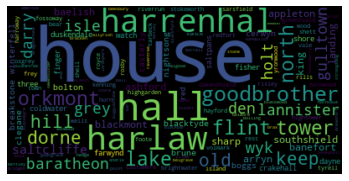

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()